Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,329 (75.50 KB)

 Trainable params: 19,329 (75.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1487 - val_loss: 0.1076
Epoch 2/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0913 - val_loss: 0.0823
Epoch 3/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0727 - val_loss: 0.0535
Epoch 4/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0517 - val_loss: 0.0295
Epoch 5/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 0.0309 - val_loss: 0.0189
Epoch 6/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.0193 - val_loss: 0.0108
Epoch 7/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.0113 - val_loss: 0.0048
Epoch 8/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.0056 - val_loss: 0.0018
Epoch 9/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 0.0023 - val_loss: 8.2209e-04
Epoch 10/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.0014 - val_loss: 4.7182e-04
Epoch 11/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 7.6502e-04 - val_loss: 2.7509e-04
Epoch 12/500
22/22 ━━━━━━━━━━━━━━

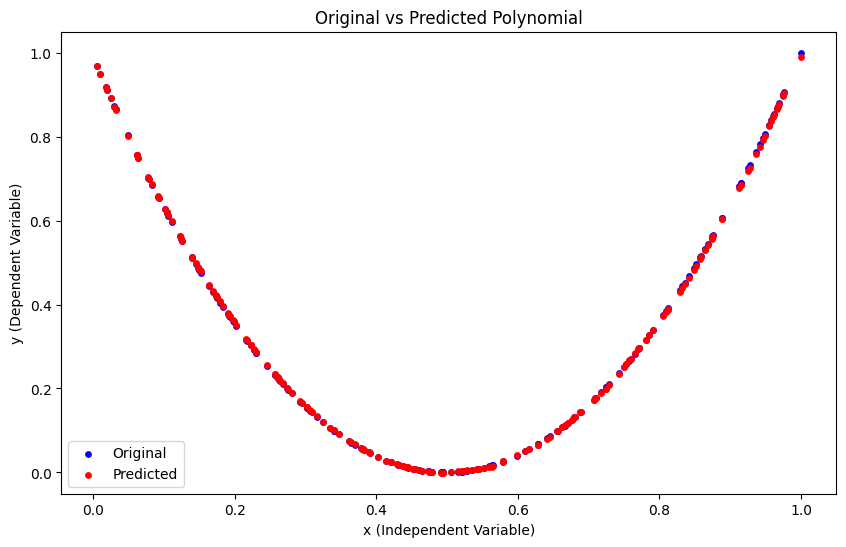

In [2]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt

def main():
    # Build model
    model = build_model()
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

    # Prepare data
    (trainX, trainY), (valX, valY), (testX, testY) = prepare_train_val_test()

    # Train model with early stopping
    history = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=500)

    # Evaluate model
    test_loss = model.evaluate(testX, testY)
    print(f"Test Loss (MSE): {test_loss}")

    # Calculate loss percentage (MAPE)
    y_pred = model.predict(testX)
    mape = np.mean(np.abs((testY - y_pred) / testY)) * 100
    print(f"Test Loss Percentage (MAPE): {mape:.2f}%")

    # Plot original vs predicted
    plt.figure(figsize=(10,6))
    plt.scatter(testX, testY, label="Original", color='blue', s=15)
    plt.scatter(testX, y_pred, label="Predicted", color='red', s=15)
    plt.title("Original vs Predicted Polynomial")
    plt.xlabel("x (Independent Variable)")
    plt.ylabel("y (Dependent Variable)")
    plt.legend()
    plt.show()

def prepare_train_val_test():
    x, y = data_process()

    # Shuffle data
    indices = np.arange(len(x))
    np.random.shuffle(indices)
    x = x[indices]
    y = y[indices]

    # Reshape for scaler
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)

    # Normalize to [0, 1]
    x_scaler = MinMaxScaler()
    y_scaler = MinMaxScaler()
    x = x_scaler.fit_transform(x)
    y = y_scaler.fit_transform(y)

    # Split into train, val, test
    total_n = len(x)
    train_n = int(total_n * 0.7)
    val_n = int(total_n * 0.1)

    trainX = x[: train_n]
    trainY = y[: train_n]
    valX = x[train_n : train_n + val_n]
    valY = y[train_n : train_n + val_n]
    testX = x[train_n + val_n :]
    testY = y[train_n + val_n :]

    return (trainX, trainY), (valX, valY), (testX, testY)

def data_process():
    n = 1000
    y = []
    # Include negative values by taking range from -n//2 to n//2
    x = np.random.randint(-n//2, n//2, n)
    for i in range(n):
        y.append(my_polynomial(x[i]))
    y = np.array(y)
    x = np.array(x)
    return x, y

def my_polynomial(x):
    y = 5 * x**2 + 10 * x -2 
    return y

def build_model():
    inputs = Input((1,))
    h1 = Dense(64, activation='relu')(inputs)
    h2 = Dense(128, activation='relu')(h1)
    h3 = Dense(64, activation='relu')(h2)
    h4 = Dense(32, activation='relu')(h3)
    h5 = Dense(16, activation='relu')(h4)
    outputs = Dense(1,)(h5)

    model = Model(inputs, outputs)
    model.summary()
    return model

if __name__ == "__main__":
    main()
